## Практична робота 3

## Завдання 1

#### Побудувати горизонтальну стовпчикову діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv("spotify-2023.csv", encoding="latin1")
data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5


### Чи є NaN в датафреймі

In [4]:
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Перевіряємо типи даних стовпців

In [5]:
data.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

### Так як у стовпці streams є комірки з нечисловими даними, то замінимо їх на NaN

In [6]:
data['streams'] = pd.to_numeric(data['streams'], errors='coerce')
data.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  1
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

### Сортуємо дані за стовпчиком reaeased_year та streams та виводимо перші 10 рядочків, за якими будемо будувати діаграму

In [7]:
sort = data[data['released_year'] == 2023]
sort = sort.sort_values(by="streams", ascending=False)
pd.options.display.float_format = '{:.2f}'.format
sort.head(10)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.00,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112.00,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598.00,119,108,254,29,22,122,D,Minor,78,50,63,27,0,9,5
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393.00,115,123,184,18,354,180,E,Minor,72,61,63,67,0,9,28
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067.00,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108.00,87,86,74,1,16,67,C#,Minor,53,50,53,23,0,44,7
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438.00,41,205,54,12,251,83,F#,Minor,57,56,72,23,0,27,5
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686.00,91,212,78,6,0,120,B,Minor,78,76,59,43,0,34,3
160,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,436027885.00,19,143,10,6,15,138,G,Minor,78,89,83,10,0,12,5
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451.00,26,124,15,1,22,127,A,Minor,80,74,77,36,0,11,4


### Обираємо стовпці з назвою пісень та відповідну кількість прослуховувань

In [8]:
track_name = sort["track_name"].head(10)
streams = sort["streams"].head(10)

### Будуємо горизонтальну стовпчикову діаграму 

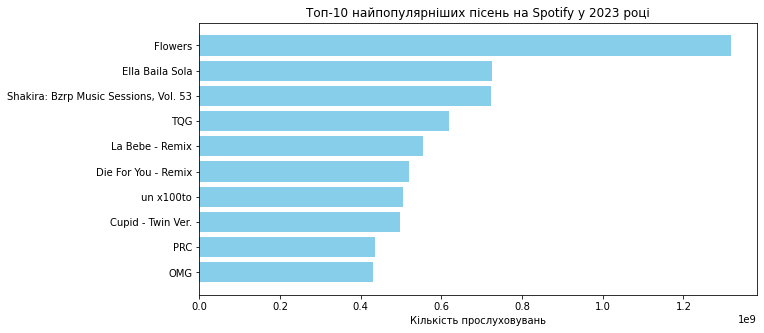

In [9]:
fig = plt.figure(figsize=(10, 5))
plt.barh(track_name, streams, color='skyblue')
plt.xlabel('Кількість прослуховувань')
plt.title('Топ-10 найпопулярніших пісень на Spotify у 2023 році')
plt.gca().invert_yaxis()  # Щоб зробити пісні від верху до низу
plt.show()

## Завдання 2

#### Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або секторну діаграму, яка відображає розподіл жанрів серед найпопулярніших пісень у 2023 році.

### Так як в нашому датафреймі немає даних про жанри пісень, зробимо кругову діаграму з розподілу виконавців пісень 2023 року

#### Відсортуємо пісні за 2023 рік

In [10]:
_data = data[data['released_year'] == 2023]
_data.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.00,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.00,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.00,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.00,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234.00,67,213,88,17,946,141,C#,Major,92,66,58,19,0,8,24


In [11]:
pd.set_option('display.max_rows', None)

### Виведемо виконавців у яких було найбільше прослуховувань на всіх піснях за 2023 рік

In [12]:
grouped_by_artist = _data.groupby(by="artist(s)_name").streams.agg("sum")
grouped_by_artist.sort_values(ascending=False, inplace=True)
grouped_by_artist=grouped_by_artist.head(10)
grouped_by_artist

artist(s)_name
Miley Cyrus                  1316855716.00
Morgan Wallen                 946694010.00
Eslabon Armado, Peso Pluma    725980112.00
Shakira, Bizarrap             721975598.00
Jimin                         705445695.00
Fifty Fifty                   636477650.00
Karol G, Shakira              618990393.00
Peso Pluma, Yng Lvcas         553634067.00
NewJeans                      518794821.00
Ariana Grande, The Weeknd     518745108.00
Name: streams, dtype: float64

### Формуємо список з кількістю прослуховувань

In [13]:
l= list()
for number in grouped_by_artist.values:
    l.append(int('{:.0f}'.format(number)))
l

[1316855716,
 946694010,
 725980112,
 721975598,
 705445695,
 636477650,
 618990393,
 553634067,
 518794821,
 518745108]

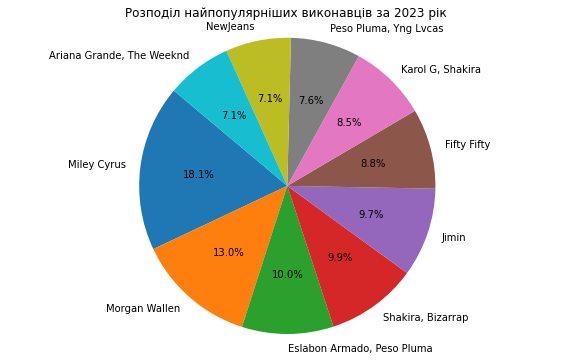

In [14]:
plt.figure(figsize=(10, 6))
plt.pie(l, labels=grouped_by_artist.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Забезпечення кругової форми
plt.title('Розподіл найпопулярніших виконавців за 2023 рік')
plt.show()

## Завдання 3

#### Динаміка популярності треку в залежності від часу: Побудуйте лінійний графік, який відображає зміни кількості прослуховувань певного треку протягом року 2023 року.

### Так як всі пісні за 2023 рік є в датафремі лише по одному разу, відслідкувати динаміку не вийде. Зробимо лінійну діаграму по даним зі стовпчика released_month десяти найпопулярніших пісень

In [15]:
newdata = _data.sort_values(by="streams", ascending=False).head(10)
newdata

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
12,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716.00,300,215,745,58,"1,021",118,NaN,Major,71,65,68,6,0,3,7
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112.00,34,222,43,13,418,148,F,Minor,67,83,76,48,0,8,3
133,"Shakira: Bzrp Music Sessions, Vol. 53","Shakira, Bizarrap",2,2023,1,11,5724,44,721975598.00,119,108,254,29,22,122,D,Minor,78,50,63,27,0,9,5
34,TQG,"Karol G, Shakira",2,2023,2,23,4284,49,618990393.00,115,123,184,18,354,180,E,Minor,72,61,63,67,0,9,28
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067.00,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33
49,Die For You - Remix,"Ariana Grande, The Weeknd",2,2023,2,24,3408,47,518745108.00,87,86,74,1,16,67,C#,Minor,53,50,53,23,0,44,7
10,un x100to,"Bad Bunny, Grupo Frontera",2,2023,4,17,2876,40,505671438.00,41,205,54,12,251,83,F#,Minor,57,56,72,23,0,27,5
16,Cupid - Twin Ver.,Fifty Fifty,1,2023,2,24,2942,77,496795686.00,91,212,78,6,0,120,B,Minor,78,76,59,43,0,34,3
160,PRC,"Natanael Cano, Peso Pluma",2,2023,1,23,961,26,436027885.00,19,143,10,6,15,138,G,Minor,78,89,83,10,0,12,5
131,OMG,NewJeans,1,2023,1,2,1783,27,430977451.00,26,124,15,1,22,127,A,Minor,80,74,77,36,0,11,4


In [16]:
l = {1:"January", 2:"February", 3:"March", 4:"April", 5:"May"}

In [17]:
month = newdata["released_month"]
month.index = newdata["track_name"]
month[3]

2

In [18]:
month.replace(l, inplace=True)
month

track_name
Flowers                                   January
Ella Baila Sola                             March
Shakira: Bzrp Music Sessions, Vol. 53     January
TQG                                      February
La Bebe - Remix                             March
Die For You - Remix                      February
un x100to                                   April
Cupid - Twin Ver.                        February
PRC                                       January
OMG                                       January
Name: released_month, dtype: object

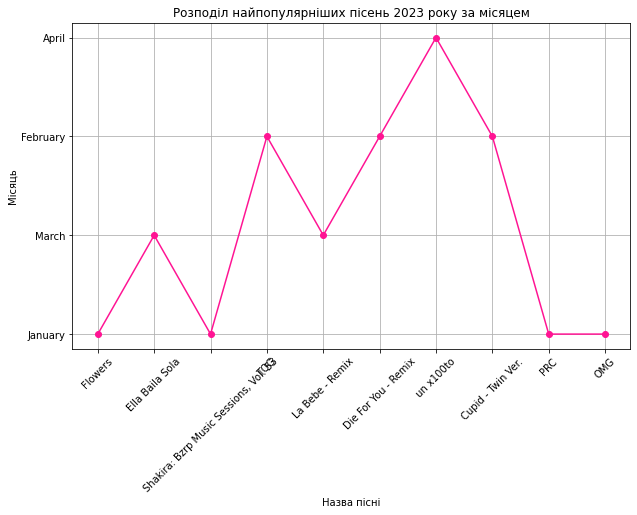

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(month.index, month.values, marker='o', linestyle='-', color="deeppink")
plt.xlabel('Назва пісні')
plt.ylabel('Місяць')
plt.title('Розподіл найпопулярніших пісень 2023 року за місяцем')
plt.xticks(rotation=45)  
plt.grid(True)
plt.show()

## Завдання 4

##### Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій відображаються 10 найпопулярніших артистів на Spotify у 2023 році за кількістю слухачів

In [20]:
grouped_by_artist = _data.groupby(by="artist(s)_name").streams.agg("sum")
grouped_by_artist.sort_values(ascending=False, inplace=True)
grouped_by_artist=grouped_by_artist.head(10)
grouped_by_artist

artist(s)_name
Miley Cyrus                  1316855716.00
Morgan Wallen                 946694010.00
Eslabon Armado, Peso Pluma    725980112.00
Shakira, Bizarrap             721975598.00
Jimin                         705445695.00
Fifty Fifty                   636477650.00
Karol G, Shakira              618990393.00
Peso Pluma, Yng Lvcas         553634067.00
NewJeans                      518794821.00
Ariana Grande, The Weeknd     518745108.00
Name: streams, dtype: float64

In [21]:
artist = grouped_by_artist.index
streams= list()
for number in grouped_by_artist.values:
    streams.append(int('{:.0f}'.format(number)))
streams

[1316855716,
 946694010,
 725980112,
 721975598,
 705445695,
 636477650,
 618990393,
 553634067,
 518794821,
 518745108]

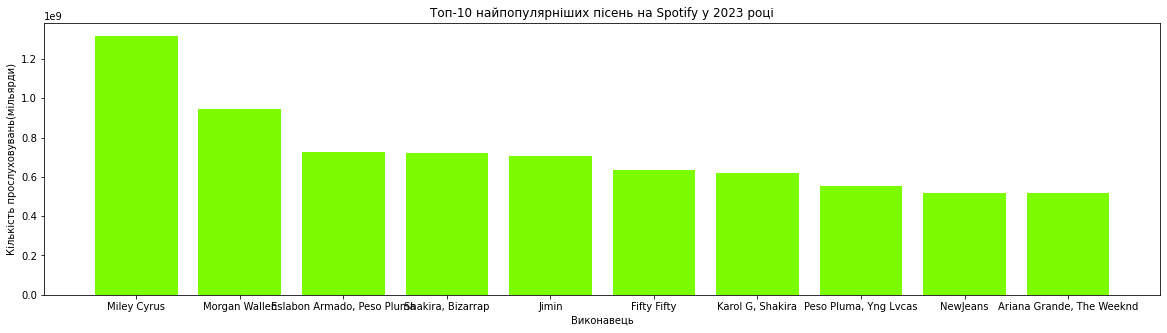

In [22]:
fig = plt.figure(figsize=(20, 5))
plt.bar(artist, streams, color='lawngreen')
plt.xlabel('Виконавець')
plt.ylabel('Кількість прослуховувань(мільярди)')
plt.title('Топ-10 найпопулярніших пісень на Spotify у 2023 році')
plt.show()

## Завдання 5

#### Порівняння популярності трьох треків: Побудуйте горизонтальну стовпчикову діаграму, яка порівнює кількість прослуховувань трьох конкретних треків у 2023 році.

### Оберемо треки з індексами 9, 11 та 4

In [23]:
_data.loc[9,"track_name"]

'La Bebe - Remix'

In [24]:
_data.loc[11,"track_name"]

'Super Shy'

In [25]:
_data.loc[4,"track_name"]

'WHERE SHE GOES'

In [26]:
newdata = data[(data["track_name"] == 'La Bebe - Remix') | (data["track_name"] == 'Super Shy') |(data["track_name"]== 'WHERE SHE GOES')]
newdata 

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.00,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067.00,49,110,66,13,339,170,D,Minor,81,56,48,21,0,8,33
11,Super Shy,NewJeans,1,2023,7,7,422,55,58255150.00,37,202,21,5,168,150,F,Minor,78,52,82,18,0,15,7


In [27]:
streams = pd.to_numeric(newdata['streams'])
streams

4    303236322.00
9    553634067.00
11    58255150.00
Name: streams, dtype: float64

In [28]:
track = newdata["track_name"]
track = track.values
track

array(['WHERE SHE GOES', 'La Bebe - Remix', 'Super Shy'], dtype=object)

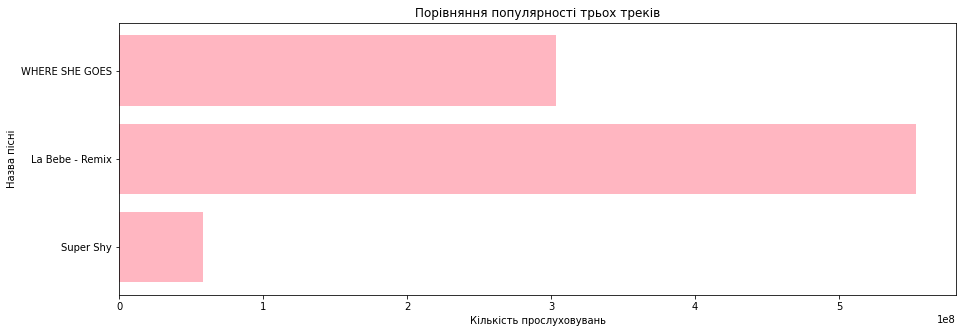

In [29]:
fig = plt.figure(figsize=(15, 5))
plt.barh(track, streams, color='lightpink')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('Порівняння популярності трьох треків')
plt.gca().invert_yaxis()  # Щоб зробити пісні від верху до низу
plt.show()